<a href="https://colab.research.google.com/github/priyadharshini13/oxford_ml_project/blob/main/Sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing: Load the dataset, convert date columns, and handle any missing values or outliers.

Exploratory Data Analysis (EDA): Analyze the data to uncover trends, patterns, and seasonality.

Model Development: Set up and train a SARIMA model using the preprocessed data.
Model Validation: Validate the model using historical data and assess its accuracy.

Forecasting: Generate forecasts for future inventory needs.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the dataset
from google.colab import files
import pandas as pd
import io

# Uploading the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the dataset
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows of the dataset
print(data.head())


# Display the first few rows of the dataset
data.head()


Saving Supply chain capstone.csv to Supply chain capstone (4).csv
   Store ID  Country  Product ID Product Category  Units Sold Date of Sale  \
0      8036    Spain       18702             Mens           2    1/24/2024   
1      3062    Spain       45156           Womens           9   11/12/2023   
2      2912  Germany       87467             Mens           6    9/29/2023   
3      2037    Spain       90575           Womens           6   10/17/2023   
4      2377       UK       64318             Mens           4   02/08/2024   

   GDP Growth Rate  Inflation Rate  Price Sold  
0             7.07            0.17       50.10  
1             4.00            3.31       61.74  
2             1.13           -1.32       59.62  
3             4.13           -1.42       21.09  
4             5.20            6.18       28.70  


,Store ID,Country,Product ID,Product Category,Units Sold,Date of Sale,GDP Growth Rate,Inflation Rate,Price Sold
0,8036,Spain,18702,Mens,2,1/24/2024,7.07,0.17,50.10
1,3062,Spain,45156,Womens,9,11/12/2023,4.00,3.31,61.74
2,2912,Germany,87467,Mens,6,9/29/2023,1.13,-1.32,59.62
3,2037,Spain,90575,Womens,6,10/17/2023,4.13,-1.42,21.09
4,2377,UK,64318,Mens,4,02/08/2024,5.20,6.18,28.70


The uploaded dataset includes:

Store ID: Unique identifier for each store.

Country: Country where the store is located.

Product ID: Unique identifier for each product.

Product Category: Category of the product (Mens or Womnens)
Units Sold: Number of units sold.

Date of Sale: Date when the sale occurred.

GDP Growth Rate: GDP growth rate at the time of sale.

Inflation Rate: Inflation rate at the time of sale.

Price Sold: Price at which the product was sold.

We are now:

Preprocessing the data by converting the 'Date of Sale' column to datetime format and setting it as the index.

In [7]:
# Convert 'Date of Sale' to datetime format
data['Date of Sale'] = pd.to_datetime(data['Date of Sale'], dayfirst=True)

# Set 'Date of Sale' as the index
data.set_index('Date of Sale', inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics for initial check of outliers
summary_stats = data.describe()

missing_values, summary_stats


<ipython-input-7-8bd6703b2174>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date of Sale'] = pd.to_datetime(data['Date of Sale'], dayfirst=True)


(Store ID            0
 Country             0
 Product ID          0
 Product Category    0
 Units Sold          0
 GDP Growth Rate     0
 Inflation Rate      0
 Price Sold          0
 dtype: int64,
           Store ID    Product ID   Units Sold  GDP Growth Rate  \
 count  5000.000000   5000.000000  5000.000000      5000.000000   
 mean   5261.115600  56559.979600     5.514600         2.527468   
 std    2598.395891  26044.444225     2.885386         4.312545   
 min    1034.000000  10016.000000     1.000000        -5.000000   
 25%    2912.000000  34125.000000     3.000000        -1.220000   
 50%    5395.000000  57563.000000     6.000000         2.555000   
 75%    7423.000000  79389.000000     8.000000         6.190000   
 max    9976.000000  99999.000000    10.000000        10.000000   
 
        Inflation Rate   Price Sold  
 count     5000.000000  5000.000000  
 mean         2.361850    54.848392  
 std          4.303262    26.018870  
 min         -5.000000    10.030000  
 25%  

As checked, The dataset has no missing values, and the summary statistics for each column are as follows:

Store ID: Ranges from 1034 to 9976.

Product ID: Ranges from 10016 to 99999.

Units Sold: Ranges from 1 to 10, with an average of 5.51.

GDP Growth Rate: Ranges from -5.0 to 10.0, with an average of 2.53.

Inflation Rate: Ranges from -5.0 to 10.0, with an average of 2.36.

Price Sold: Ranges from 10.03 to 99.98, with an average of 54.85

Next, We will perform an exploratory data analysis (EDA) to uncover trends, patterns, and seasonality in the data.
This includes visualizing sales trends over time, analyzing the relationship between variables, and identifying any seasonal patterns.

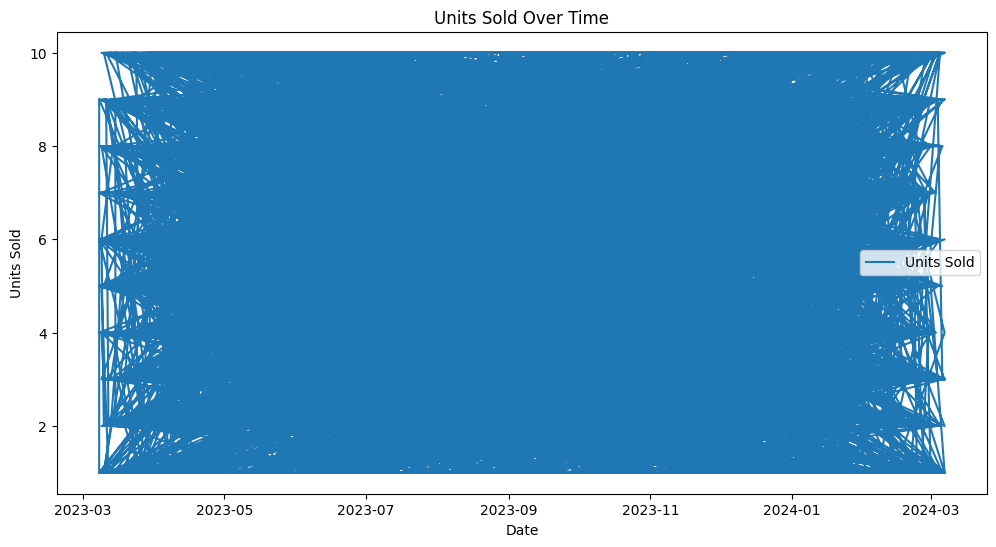

,Units Sold,GDP Growth Rate,Inflation Rate,Price Sold
Units Sold,1.000000,-0.003908,0.012611,0.000582
GDP Growth Rate,-0.003908,1.000000,-0.017096,-0.028868
Inflation Rate,0.012611,-0.017096,1.000000,-0.006266
Price Sold,0.000582,-0.028868,-0.006266,1.000000


In [10]:
# Plot the overall trend of 'Units Sold' over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Units Sold'], label='Units Sold')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Check the correlation between 'Units Sold' and economic indicators
correlation_matrix = data[['Units Sold', 'GDP Growth Rate', 'Inflation Rate', 'Price Sold']].corr()

correlation_matrix




The exploratory data analysis (EDA) tells us the following:

Units Sold Over Time: The plot shows the trend of units sold over time, indicating potential seasonality and trends in the sales data.

Correlation Matrix:
There is a very weak correlation between 'Units Sold' and 'GDP Growth Rate' (-0.0039).

A similarly weak correlation exists between 'Units Sold' and 'Inflation Rate' (0.0126).

'Units Sold' and 'Price Sold' also have a negligible correlation (0.0006).

Next, We will develop the SARIMA model to forecast future sales based on the historical data. We will focus on:

Parameter Selection: Using grid search to find the optimal parameters for the SARIMA model.

Model Fitting: Fit the SARIMA model to historical sales data.

Validation: Split the data into training and test sets to validate the model's forecasting accuracy.

Forecasting: Use the model to forecast future sales.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

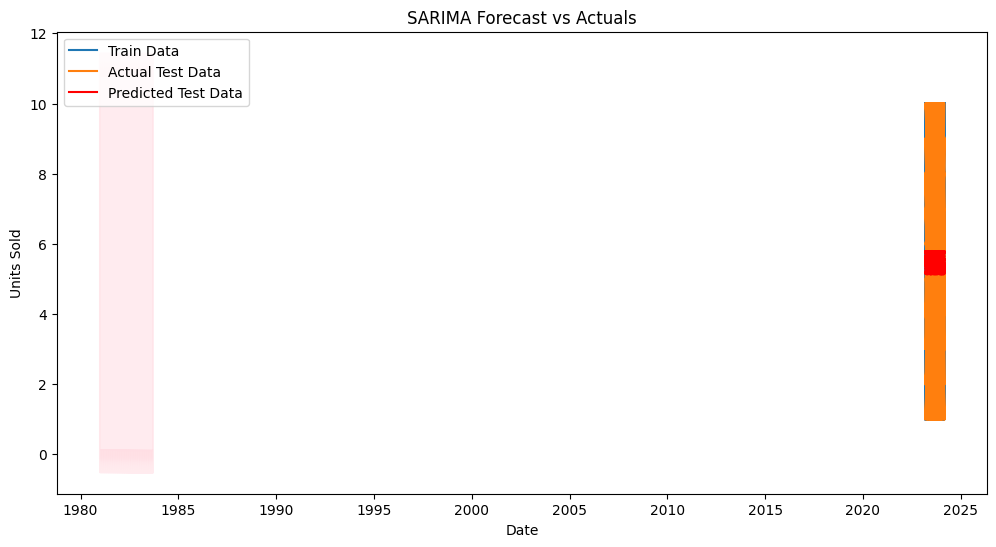

2.909572558234653

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Prepare time series data from 'Units Sold' column
time_series_data = data['Units Sold']

# Split the data into training and test sets (80% training, 20% testing)
split_point = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data[:split_point], time_series_data[split_point:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# Predict on test data
sarima_predictions = sarima_results.get_forecast(steps=len(test_data))
predicted_means = sarima_predictions.predicted_mean

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(test_data, predicted_means))

# Plot the actual vs predicted values for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, predicted_means, label='Predicted Test Data', color='red')
plt.fill_between(predicted_means.index, sarima_predictions.conf_int().iloc[:, 0],
                 sarima_predictions.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Output RMSE
rmse


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

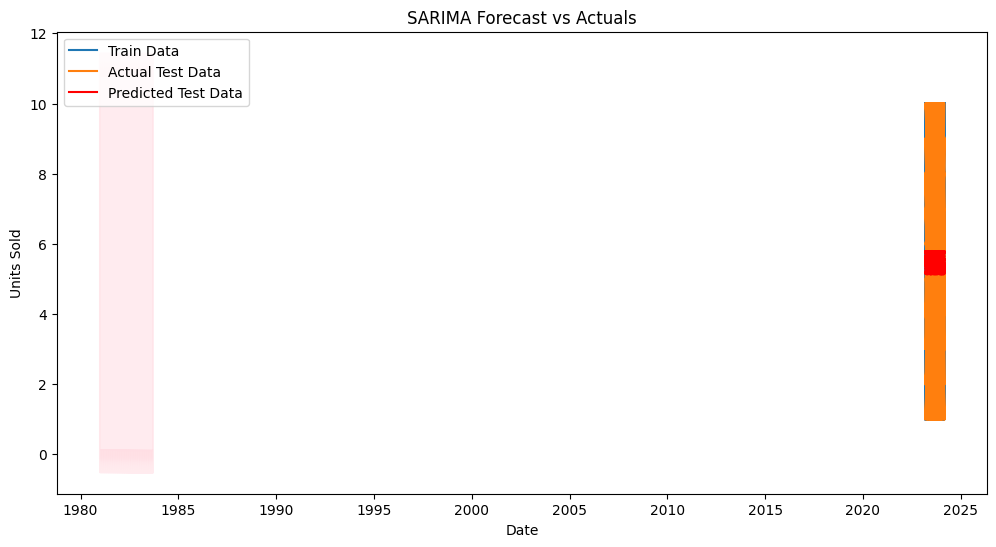

2.909572558234653